# analyzing dense output
Timothy Tyree<br>
3.26.2021

In [3]:
darkmode=False
from lib.my_initialization import *
# For darkmode plots
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)


## plot the collision times

In [155]:
#load the example data
# os.chdir(nb_dir)
# data_dir='data/out.csv'
# assert ( os.path.exists(data_dir) ) 
# df=pd.read_csv(data_dir,lineterminator=None)

#load a log file
input_folder=f"{nb_dir}/data"
input_fn='example.log'
os.chdir(input_folder)
df=parse_output_log(input_fn, include_inputs=False,printing=False)
Ntrials=df.index.values.shape[0]
Nmin=11
df.drop(columns=[f'{i}' for i in range(Nmin)], inplace=True)
#any duds still there?
assert ( not (df.values<-9000).any() )
df.head()

,11,12,13,14,15,16,17,18,19,20,...,60,61,62,63,64,65,66,67,68,69
0,2.47000,2.47000,2.47000,2.47000,2.47000,2.47000,0.69080,0.56114,0.56114,0.56114,...,0.06454,0.06454,0.06454,0.06454,0.06454,0.06454,0.06454,0.06454,0.06454,0.02795
1,1.18204,1.18204,1.18204,1.18204,1.18204,1.18204,1.18204,1.18204,1.18204,1.18204,...,0.10980,0.10980,0.02032,0.02032,0.02032,0.02032,0.02032,0.02032,0.02032,0.02032
2,0.81593,0.81593,0.81593,0.81593,0.81593,0.81593,0.81593,0.81593,0.81593,0.81593,...,0.03425,0.03425,0.03425,0.03425,0.03425,0.03425,0.03425,0.03425,0.03425,0.03425
3,0.14193,0.14193,0.14193,0.14193,0.14193,0.14193,0.14193,0.14193,0.14193,0.14193,...,0.03570,0.03570,0.03570,0.03570,0.02346,0.02346,0.02346,0.02346,0.02346,0.02346
4,2.43258,2.43258,2.43258,2.43258,2.43258,2.43258,2.43258,2.43258,2.43258,2.43258,...,0.00877,0.00877,0.00877,0.00877,0.00877,0.00877,0.00877,0.00877,0.00877,0.00877


In [156]:
dfd=df.describe().T.drop(columns=['count'])
dfd.head()

,mean,std,min,25%,50%,75%,max
11,1.282126,1.340333,0.00269,0.311847,0.852540,1.832960,7.00783
12,1.090162,1.123887,0.00269,0.276240,0.735680,1.507798,6.12881
13,0.898572,0.930067,0.00269,0.261888,0.639650,1.217553,5.53320
14,0.776358,0.756320,0.00269,0.222100,0.601945,1.057830,4.84248
15,0.660640,0.661866,0.00108,0.172733,0.502590,0.893335,3.97202


In [157]:
#extract the values
x_values=np.array([eval(x) for x in dfd.index.values])
y_values=np.array(dfd['50%'].values)
yerr1_values=np.array(dfd['25%'].values)
yerr2_values=np.array(dfd['75%'].values)

y2_values=np.array(dfd['mean'].values)
y2err1_values=y2_values-np.array(dfd['std'].values)
y2err2_values=y2_values+np.array(dfd['std'].values)

saved figure in 
	colltimes.png


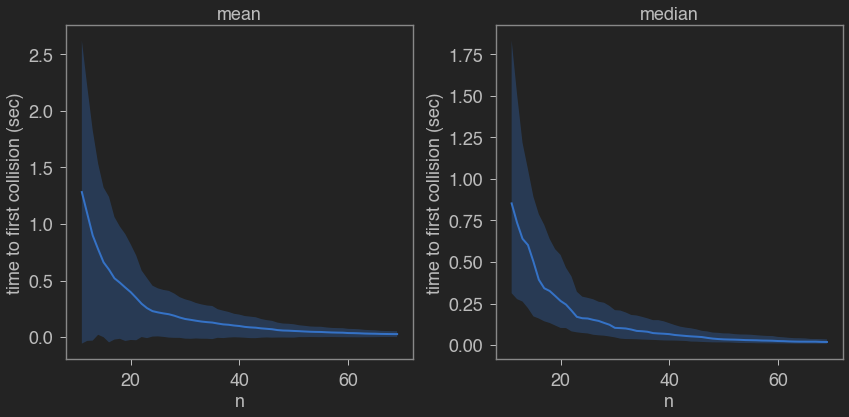

In [158]:
#plot the values
figsize=(12,6)
fontsize=18
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn='colltimes.png'
fig, axs = plt.subplots(ncols=2,figsize=figsize)
ax=axs[1]
ax.fill_between(x_values,yerr1_values,yerr2_values,alpha=0.3)
ax.plot(x_values,y_values,lw=2)
ax.set_xlabel('n', fontsize=fontsize)
ax.set_ylabel(r'time to first collision (sec)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.set_title('median', fontsize=fontsize)
ax=axs[0]
ax.fill_between(x_values,y2err1_values,y2err2_values,alpha=0.3)
ax.plot(x_values,y2_values,lw=2)
ax.set_xlabel('n', fontsize=fontsize)
ax.set_ylabel(r'time to first collision (sec)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.set_title('mean', fontsize=fontsize)
fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

## plot the collision rates

saved figure in 
	collrates.png


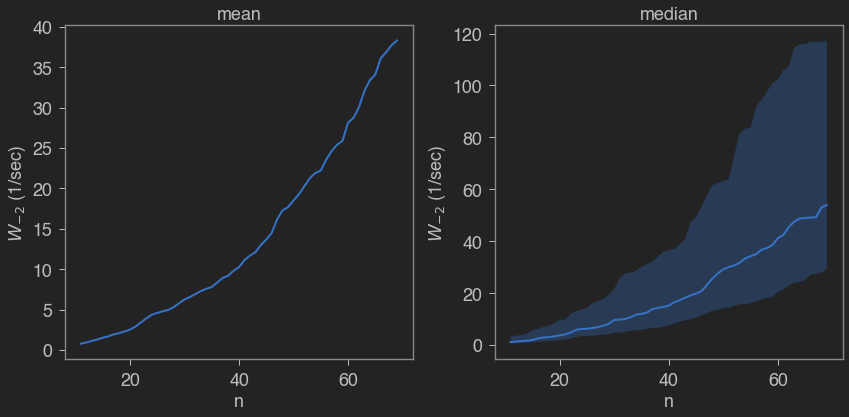

In [163]:
#plot the values
figsize=(12,6)
fontsize=18
saving=True
savefig_folder=f'{nb_dir}/../fig'
savefig_fn='collrates.png'
fig, axs = plt.subplots(ncols=2,figsize=figsize)
ax=axs[1]
ax.fill_between(x_values,1/yerr2_values,1/yerr1_values,alpha=0.3)
ax.plot(x_values,1/y_values,lw=2)
ax.set_xlabel('n', fontsize=fontsize)
ax.set_ylabel(r'$W_{{-2}}$ (1/sec)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.set_title('median', fontsize=fontsize)
ax=axs[0]
# ax.fill_between(x_values,1/y2err2_values,1/y2err1_values,alpha=0.3)
ax.plot(x_values,1/y2_values,lw=2)
ax.set_xlabel('n', fontsize=fontsize)
ax.set_ylabel(r'$W_{{-2}}$ (1/sec)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
# ax.set_ylim([0,1])
ax.set_title('mean', fontsize=fontsize)
fig.tight_layout()
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

## Results
collision rates/times are being generated with uncertainty that cannot be reliably quantified in terms of mean and standard deviation. Therefore, output logs must include dense output

- DONE: dev parsing output logs
- DONE: generate run_1.dat and run_test.dat


In [144]:
def parse_output_log(input_fn,include_inputs=True,printing=False):
    with open(input_fn) as f:
        trgt1='Printing Inputs...\n'
        trgt2='Printing Outputs...\n'
        for n,line in enumerate(f):
            if trgt1 == line:
                if printing:
                    print(f'found inputs starting after line {n}')
                n_input=n
            if trgt2 == line:
                if printing:
                    print(f'found outputs starting after line {n}')
                n_output=n

    with open(input_fn) as f:
        inputs=f.readlines()[n_input+1:n_output-1]
    col_name_lst=[]
    col_value_lst=[]
    for line in inputs:
        string=line.split(' ')[-1]
        eid=string.find('=')
        if eid!=-1:
            col_name=string[:eid]
            col_value=eval(string[eid+1:-2])
            col_name_lst.append(col_name)
            col_value_lst.append(col_value)
    df=pd.read_csv(input_fn,header=n_output-2)
    #drop that 'Unammed: {Nmax}' column 
    df.drop(columns=[df.columns[-1]], inplace=True)
    if include_inputs:
        if printing:
            print("input parameters were:")
            print(col_name_lst)
            print(col_value_lst)
            print("returning outputs as pandas.DataFrame instance")
        for name,value in zip ( col_name_lst, col_value_lst):
            df[name]=value
    return df

In [147]:
input_folder=f"{nb_dir}/data"
input_fn='example.log'
os.chdir(input_folder)
df=parse_output_log(input_fn, include_inputs=True,printing=True)
df.head()

found inputs starting after line 10
found outputs starting after line 17
input parameters were:
['r', 'D', 'L', 'kappa', 'dt']
[5.0, 1.56, 2.025, 1.0, 1.0]
returning outputs as pandas.DataFrame instance


,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,r,D,L,kappa,dt
0,-9.99900e+03,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,2.47000,...,0.06454,0.06454,0.06454,0.06454,0.02795,5.0,1.56,2.025,1.0,1.0
1,-9.99900e+03,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,1.18204,...,0.02032,0.02032,0.02032,0.02032,0.02032,5.0,1.56,2.025,1.0,1.0
2,-9.99900e+03,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,...,0.03425,0.03425,0.03425,0.03425,0.03425,5.0,1.56,2.025,1.0,1.0
3,-9.99900e+03,0.14193,0.14193,0.14193,0.14193,0.14193,0.14193,0.14193,0.14193,0.14193,...,0.02346,0.02346,0.02346,0.02346,0.02346,5.0,1.56,2.025,1.0,1.0
4,-9.99900e+03,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,...,0.00877,0.00877,0.00877,0.00877,0.00877,5.0,1.56,2.025,1.0,1.0


## generate run_1.dat 


In [167]:
A_values=np.array([20.25,25,39,50,56.25,100,156.25,189])[::-1]
L_values=np.sqrt(A_values)
L_values

array([13.74772708, 12.5       , 10.        ,  7.5       ,  7.07106781,
        6.244998  ,  5.        ,  4.5       ])

In [183]:
niter=250 #trials per worker
r_values=np.array([0.1,0.2,0.3,0.4,0.5,1.0])#cm
D_values=np.array([0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0])#cm^2/s
A_values=np.array([20.25,25,39,50,56.25,100,156.25,189])[::-1]#cm^2
L_values=np.sqrt(A_values)#cm
kappa_values=np.array([1,10,100])#1/s
num_trials_per_setting=6
#iterate over settings, scheduling the longest jobs first
count=0
for r in r_values:
    for D in D_values:
        for L in L_values:
            for kappa in kappa_values:
                num_trials=0
                while num_trials<num_trials_per_setting:
                    num_trials+=1
                    count=count+1
print(count)

6912


## debugging log parsing

In [16]:
input_fn='/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/Log/job.out.8623404.5130'
# def parse_output_log(input_fn,
include_inputs=True,
printing=True
# ):
with open(input_fn) as f:
    trgt1='Printing Inputs...\n'
    trgt2='Printing Outputs...\n'
    for n,line in enumerate(f):
        if trgt1 == line:
            if printing:
                print(f'found inputs starting after line {n}')
            n_input=n
        if trgt2 == line:
            if printing:
                print(f'found outputs starting after line {n}')
            n_output=n

with open(input_fn) as f:
    inputs=f.readlines()[n_input+1:n_output-1]
col_name_lst=[]
col_value_lst=[]
for line in inputs:
    string=line.split(' ')[-1]
    eid=string.find('=')
    if eid!=-1:
        col_name=string[:eid]
        col_value=eval(string[eid+1:-1])
        col_name_lst.append(col_name)
        col_value_lst.append(col_value)
df=pd.read_csv(input_fn,header=n_output-1)
#drop that 'Unammed: {Nmax}' column 
df.drop(columns=[df.columns[-1]], inplace=True)
if include_inputs:
    if printing:
        print("input parameters were:")
        print(col_name_lst)
        print(col_value_lst)
        print("returning outputs as pandas.DataFrame instance")
    for name,value in zip ( col_name_lst, col_value_lst):
        df[name]=value
#     return df

found inputs starting after line 11
found outputs starting after line 18


NameError: name 'pd' is not defined

In [9]:
eid=string.find('=')
if eid!=-1:
    col_name=string[:eid]
    col_value=eval(string[eid+1:-2])
    col_name_lst.append(col_name)
    col_value_lst.append(col_value)

SyntaxError: unexpected EOF while parsing (<string>, line 0)

In [15]:
string[eid+1:-1]

'1'

# (not meant for this ipynb) analyze manual output

In [19]:
arr1=np.array([6.62549e-05,6.329412e-05,6.154902e-05,5.390196e-05,4.927451e-05,4.609804e-05,4.245098e-05,4.035294e-05,3.492157e-05,2.927451e-05,2.776471e-05,2.539216e-05,2.288235e-05,1.94902e-05,1.717647e-05,1.590196e-05,1.413725e-05,1.362745e-05,1.109804e-05,1.011765e-05,9.235294e-06,8.941176e-06,7.941176e-06,7.039216e-06,6.313725e-06,6.176471e-06,6.078431e-06,6e-06,5.823529e-06,5.45098e-06,4.529412e-06,4.509804e-06,4.352941e-06,4.313725e-06,4e-06,3.921569e-06,3.862745e-06,3.745098e-06,3.588235e-06,3.411765e-06,3.333333e-06,2.627451e-06,2.529412e-06,2.490196e-06,2.313725e-06,2.313725e-06,2.294118e-06,2.27451e-06,2.254902e-06,2.078431e-06,1.960784e-06,1.803922e-06,1.72549e-06,1.705882e-06,1.647059e-06,1.627451e-06,1.588235e-06,1.568627e-06,1.568627e-06,1.529412e-06,1.45098e-06,1.45098e-06,1.45098e-06,1.45098e-06,1.45098e-06,1.431373e-06,1.431373e-06,1.431373e-06,1.431373e-06,1.431373e-06,1.411765e-06,1.392157e-06,1.392157e-06,1.352941e-06,1.333333e-06,1.333333e-06,1.313725e-06,1.313725e-06,1.27451e-06,1.215686e-06,1.215686e-06,1.176471e-06,1.176471e-06,1.176471e-06,1.176471e-06,1.176471e-06,1.176471e-06,1.176471e-06,1.176471e-06,1.137255e-06,1.137255e-06,1.137255e-06,1.137255e-06,1.137255e-06,1.137255e-06,1.117647e-06,1.098039e-06,1.078431e-06,1.078431e-06,1.078431e-06,1.078431e-06,1.078431e-06,1.078431e-06,1.078431e-06,1.078431e-06,1.078431e-06,1.078431e-06,1.078431e-06,1.078431e-06,1.078431e-06,1.058824e-06,1.058824e-06])
arr2=np.array([4.143137e-05,4.027451e-05,4.027451e-05,4.015686e-05,3.792157e-05,3.439216e-05,2.94902e-05,2.560784e-05,2.513725e-05,2.264706e-05,2.058824e-05,1.770588e-05,1.670588e-05,1.55098e-05,1.523529e-05,1.347059e-05,1.168627e-05,1.009804e-05,9.529412e-06,9.058824e-06,8.431373e-06,8e-06,7.666667e-06,7.666667e-06,7.215686e-06,6.509804e-06,5.901961e-06,5.666667e-06,5e-06,4.627451e-06,4.156863e-06,3.960784e-06,3.784314e-06,3.72549e-06,3.607843e-06,3.529412e-06,3.529412e-06,3.333333e-06,3.313725e-06,3.294118e-06,3.039216e-06,2.980392e-06,2.745098e-06,2.490196e-06,2.352941e-06,2.333333e-06,2.333333e-06,2.333333e-06,2.235294e-06,2.215686e-06,2.137255e-06,2.039216e-06,1.960784e-06,1.921569e-06,1.882353e-06,1.882353e-06,1.862745e-06,1.803922e-06,1.72549e-06,1.705882e-06,1.666667e-06,1.490196e-06,1.333333e-06,1.333333e-06,1.313725e-06,1.294118e-06,1.27451e-06,1.27451e-06,1.254902e-06,1.254902e-06,1.254902e-06,1.254902e-06,1.254902e-06,1.254902e-06,1.235294e-06,1.235294e-06,1.235294e-06,1.215686e-06,1.215686e-06,1.215686e-06,1.196078e-06,1.176471e-06,1.156863e-06,1.156863e-06,1.117647e-06,1.117647e-06,1.117647e-06,1.117647e-06,1.117647e-06,1.117647e-06,1.117647e-06,1.098039e-06,1.098039e-06,1.058824e-06,1.039216e-06,1.039216e-06,1.039216e-06,1.039216e-06,1.039216e-06,1.039216e-06,1.039216e-06,1.039216e-06,1.039216e-06,1.039216e-06,1.039216e-06,1.039216e-06,1.039216e-06,1.039216e-06,1.039216e-06,1.019608e-06,1.019608e-06,1.019608e-06,1.019608e-06,1.019608e-06,1.019608e-06,1.019608e-06])

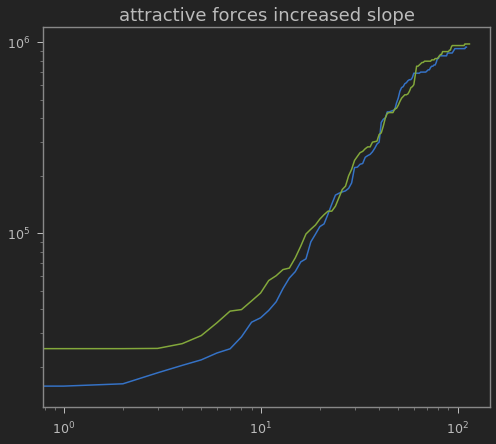

In [21]:
fontsize=18
plt.plot(1/arr1)
plt.plot(1/arr2)
plt.xscale('log')
plt.yscale('log')
# plt.xlim([1e-0,1e3])
# plt.ylim([1e4,6e6])
plt.title('attractive forces increased slope',fontsize=fontsize)
plt.show()

In [18]:
from numpy import linspace
from scipy.integrate import odeint

#you can choose a better guess using fsolve instead of 0
def integral(y, _, F_l, M, cache=[0]):
    v, preva = y[1], cache[0]
    #use value for 'a' from the previous timestep
    F_r = (((1 - preva) / 3) ** 2 + (2 * (1 + preva) / 3) ** 2) * v 
    #calculate the new value
    a = (F_l - F_r) / M
    cache[0] = a
    return [v, a]

y0 = [0, 5]
time = linspace(0., 10., 1000)
F_lon = 100.
mass = 1000.

dydt = odeint(integral, y0, time, args=(F_lon, mass))

In [23]:
dydt.shape

(1000, 2)

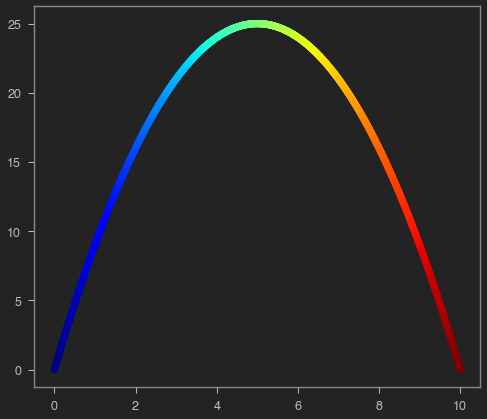

In [33]:
plt.scatter(x=time,y=time*(10-time),c=time,cmap='jet')
# plt.scatter(x=time,y=dydt[:,0],c=time,cmap='jet')
# plt.scatter(x=time,y=dydt[:,1])

# plt.xscale('log')
# plt.yscale('log')
# plt.xlim([1e-1,1e1])
# plt.ylim([1e4,6e4])
# plt.title('accelerated attraction/annihilation trials only')
plt.show()